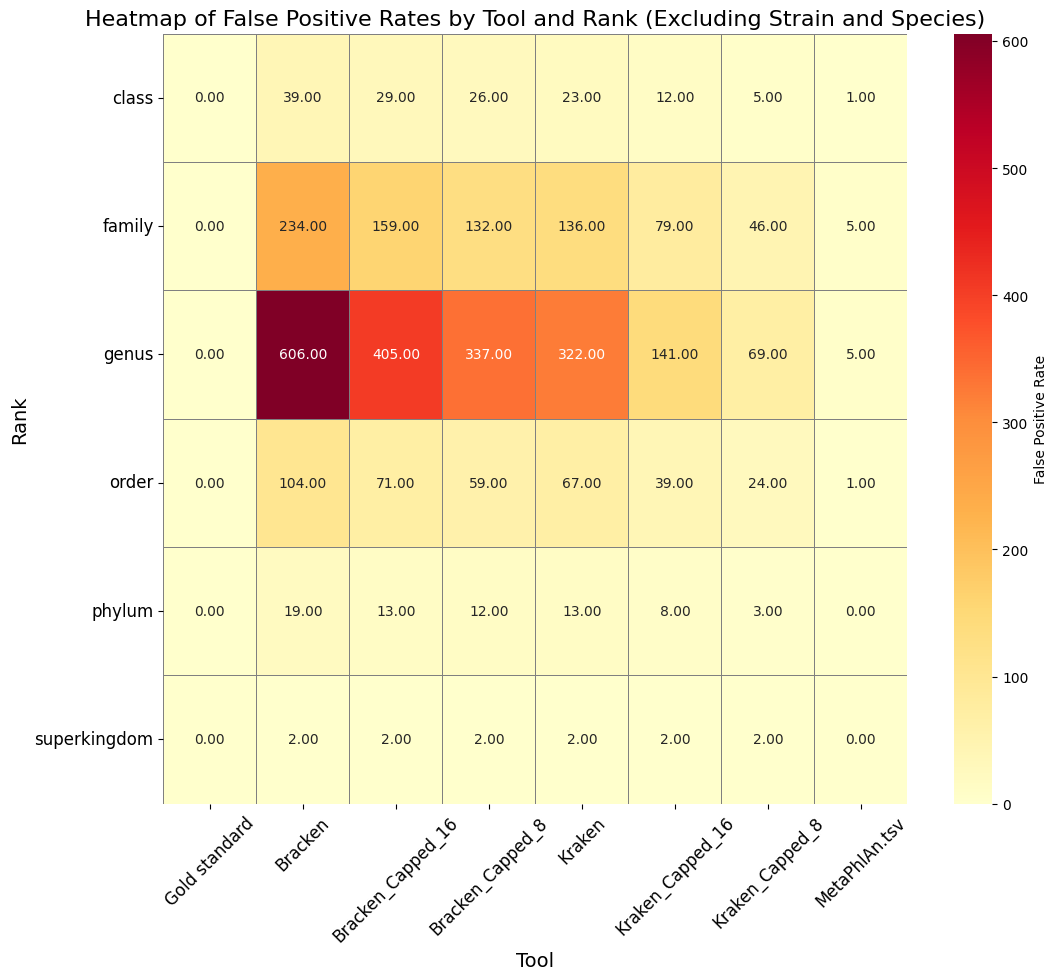

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data from a TSV file
file_path = 'results/s_results.tsv'  # Change this to the path of your TSV file
df = pd.read_csv(file_path, sep='\t')

# Filter data to only include rows where the metric is related to false positives
# and exclude the ranks 'strain' and 'species'
false_positive_data = df[(df['metric'].str.contains("False positives")) & (~df['rank'].isin(['strain', 'species']))]

# Pivot the DataFrame to prepare for heatmap creation
heatmap_data = false_positive_data.pivot_table(index=['rank'], columns='tool', values='value', aggfunc='mean')

# Manually reorder the columns to ensure 'Gold standard' appears first
# If 'Gold standard' is not a column or the name differs, adjust accordingly.
cols = ['Gold standard'] + [col for col in heatmap_data.columns if col != 'Gold standard']
heatmap_data = heatmap_data[cols]

# Creating the heatmap
plt.figure(figsize=(12, 10))  # Adjusted for a better display size
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=.5, linecolor='gray',
                 cbar_kws={'label': 'False Positive Rate'})

# Enhancements for aesthetics
ax.set_ylabel('Rank', fontsize=14)
ax.set_xlabel('Tool', fontsize=14)
ax.tick_params(labelsize=12)  # Adjust font size for tick labels
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels horizontal

# Save the figure
plt.savefig('heatmap_false_positives.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()
